In [1]:
import tensorflow
tensorflow.__version__

'2.8.0'

本教程数据集来源：

📌 [数据集来源](https://www.kaggle.com/competitions/digit-recognizer/data)


# <b>1 <span style='color:#F1C40F'>|</span> 利用Keras实现LeNet-5</b>
本章节内容部分来源于:

-  📌 [LeNet-5 CNN with TensorFlow - 98.5%](https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-tensorflow-98-5/notebook)
- 📌 [Advanced CNN Architectures](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-5/v-3/23)


<b></b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>准备数据</b></p>
</div>


### 导入下载的train.csv

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 ...    ...    ...    ...    ...    ...    ...   

728 729 730 731 ... 754 755

756 757 758 759 ... 782 783 

In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]

In [3]:
type(X), X.shape

(pandas.core.frame.DataFrame, (42000, 784))

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
X = X.astype('float32') / 255

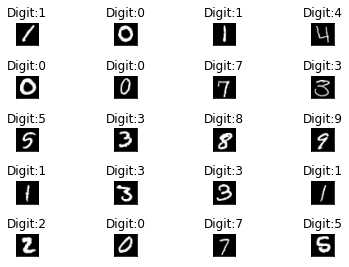

In [6]:
import matplotlib.pyplot as plt
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(X, y)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>对数据进行预处理</b></p>
</div>

In [7]:
from sklearn.model_selection import train_test_split
X_dev, X_val, y_dev, y_val = train_test_split(X, y, test_size=0.03, shuffle=True, random_state=2022)

X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

from tensorflow.keras.utils import to_categorical
y_dev = pd.get_dummies(y_dev).values
y_val = pd.get_dummies(y_val).values

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>定义LeNet-5网络</b></p>
</div>

![Le-Net5架构](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_02.png)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten

# Instantiate an empty sequential model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh',  input_shape = (28,28,1), padding =  'same' ))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding =  'valid' ))

# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh', padding =  'valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding =  'valid' ))

# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh', padding =  'valid' ))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))

# FC7 Output layer with softmax activation
model.add(Dense(units = 10, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

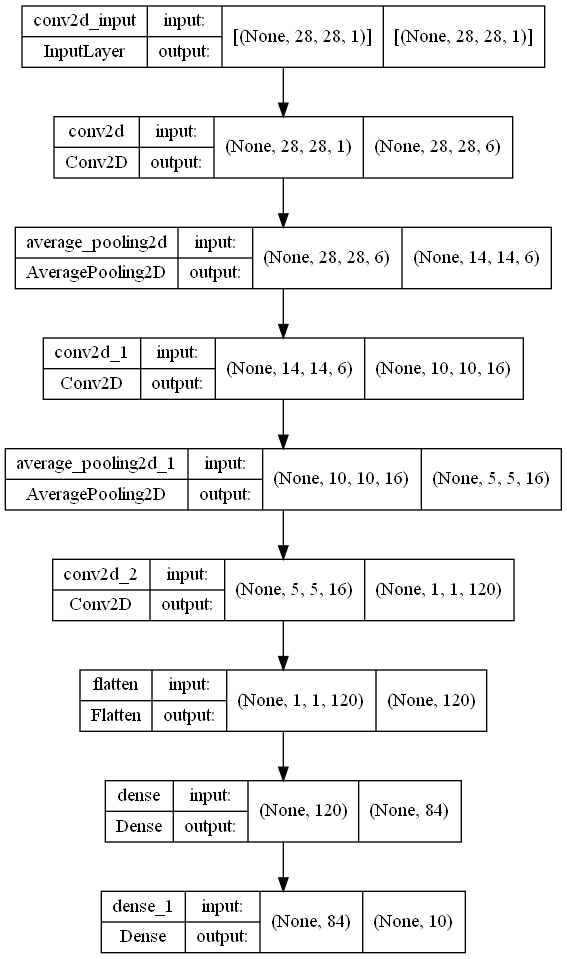

In [9]:
from tensorflow.keras.utils import plot_model 
plot_model(model, show_shapes=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>设定学习细节和模型学习</b></p>
</div>

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=5e-4))
model.fit(X_dev, y_dev, epochs=50, batch_size=64)

Epoch 1/50
637/637 [==============================] - 6s 9ms/step - loss: 0.4282 - accuracy: 0.8747
Epoch 2/50
637/637 [==============================] - 6s 9ms/step - loss: 0.1724 - accuracy: 0.9480
Epoch 3/50
637/637 [==============================] - 6s 9ms/step - loss: 0.1108 - accuracy: 0.9663
Epoch 4/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0797 - accuracy: 0.9764
Epoch 5/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0641 - accuracy: 0.9800
Epoch 6/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0516 - accuracy: 0.9847
Epoch 7/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0445 - accuracy: 0.9864
Epoch 8/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0371 - accuracy: 0.9889
Epoch 9/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 10/50
637/637 [==============================] - 6s 9ms/step - loss: 0.0276 - accuracy: 0.9919

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>利用predict函数获得预测或利用evaluate函数进行模型评估</b></p>
</div>


In [11]:
performance = model.evaluate(X_val, y_val, batch_size=32)
dict(zip(model.metrics_names, performance))

40/40 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9810


{'loss': 0.07980161160230637, 'accuracy': 0.9809523820877075}

In [12]:
X_test = np.array(pd.read_csv('test.csv'))/255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

y_test = model.predict(X_test)
y_test

array([[4.3765606e-11, 4.5296319e-12, 1.0000000e+00, ..., 4.1339210e-10,
        1.0857140e-10, 4.7504259e-13],
       [9.9999559e-01, 7.3456344e-14, 8.4250624e-09, ..., 3.8122634e-09,
        7.7638855e-09, 2.8032085e-08],
       [3.0079832e-12, 5.2546859e-11, 3.6425370e-11, ..., 1.5308359e-10,
        6.4730564e-08, 9.9999952e-01],
       ...,
       [1.3544587e-15, 4.8215317e-11, 1.1658853e-11, ..., 7.8757990e-12,
        1.7317393e-10, 1.4045763e-10],
       [4.0813238e-12, 1.9781832e-11, 2.0272433e-11, ..., 1.4832040e-09,
        1.0659248e-08, 9.9999452e-01],
       [2.5131816e-10, 4.8582353e-11, 1.0000000e+00, ..., 2.8581712e-12,
        6.0334909e-10, 4.7749256e-13]], dtype=float32)

In [13]:
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

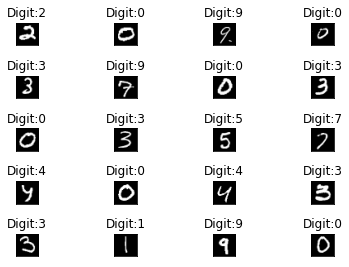

In [14]:
plot_digits(X_test, y_test)


# <b>2 <span style='color:#F1C40F'>|</span> 函数式 API</b>
<b></b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>什么是函数式 API</b></p>
</div>

Keras里定义模型有两种方法：一种是使用 Sequential 类，其仅用于层的线性堆叠，另一种是函数式 API (functional API)，用于层组成的有向无环图。
函数式 API有以下特点：

- 使用函数式 API，你可以直接操作张量，也可以把层当作函数来使用，接收张量并返回张量（因此得名函数式 API） 

- 使用函数式 API，你可以构建任意形式的网络架构


<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>用函数式 API实现等价的Sequential类网络</b></p>
</div>


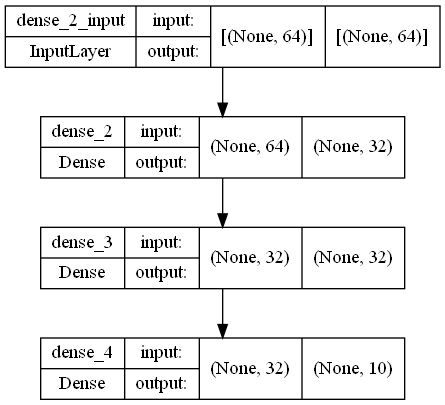

In [15]:
seq_model = Sequential()
seq_model.add(Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10, activation='softmax'))
plot_model(seq_model, show_shapes=True)

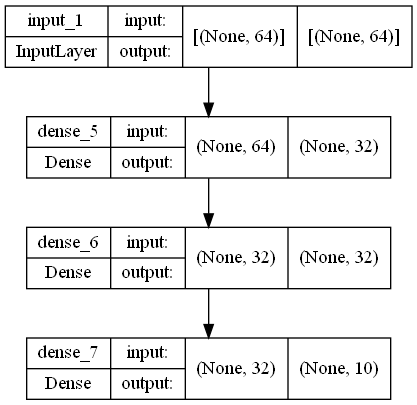

In [16]:
from tensorflow.keras import  Model, Input

input_tensor = Input(shape=(64,))
x = Dense(32, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)
func_model = Model(input_tensor, output_tensor)
plot_model(func_model, show_shapes=True)

# <b>3 <span style='color:#F1C40F'>|</span> 实现Inception网络</b>
<b></b>

Inception首次出现在2014年ILSVRC 比赛中获得冠军。这次的版本通常称其为Inception V1。Inception V1有22层深，参数量为5M。同一时期的VGGNet性能和Inception V1差不多，但是参数量也是远大于Inception V1。

![Inception架构](https://nicolovaligi.com/articles/history-inception-deep-learning-architecture/inception_module.png)

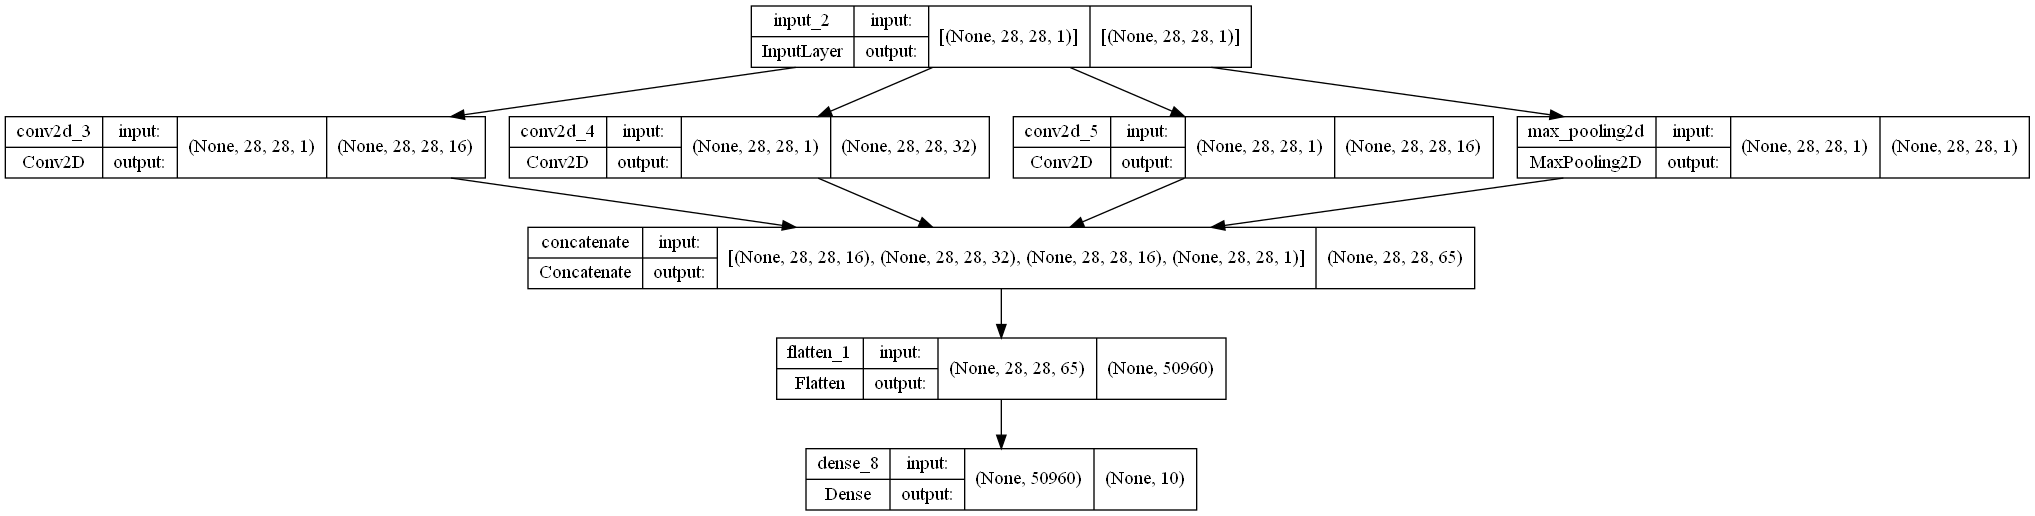

In [18]:
# function for creating a naive inception block
def inception_block(layer_in, f1, f2, f3):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out


from tensorflow.keras.layers import concatenate

inp = Input(shape=(28, 28, 1))
x = inception_block(inp, 16, 32, 16)
x = Flatten()(x)
out = Dense(10, activation='softmax')(x)
inception_model = Model(inp, out)
plot_model(inception_model, show_shapes=True)

In [19]:
inception_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=5e-4))
inception_model.fit(X_dev, y_dev, epochs=50, batch_size=64)

Epoch 1/50
637/637 [==============================] - 19s 29ms/step - loss: 0.2471 - accuracy: 0.9301
Epoch 2/50
637/637 [==============================] - 17s 26ms/step - loss: 0.0863 - accuracy: 0.9749
Epoch 3/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0571 - accuracy: 0.9835
Epoch 4/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0439 - accuracy: 0.9871
Epoch 5/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 6/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0272 - accuracy: 0.9925
Epoch 7/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0241 - accuracy: 0.9928
Epoch 8/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0190 - accuracy: 0.9946
Epoch 9/50
637/637 [==============================] - 14s 22ms/step - loss: 0.0160 - accuracy: 0.9952
Epoch 10/50
637/637 [==============================] - 14s 22ms/step - loss: 0.011

In [20]:
performance = inception_model.evaluate(X_val, y_val, batch_size=32)
dict(zip(inception_model.metrics_names, performance))

40/40 [==============================] - 0s 7ms/step - loss: 0.0981 - accuracy: 0.9810


{'loss': 0.0980709120631218, 'accuracy': 0.9809523820877075}

# <b>4 <span style='color:#F1C40F'>|</span> 实现ResNet网络</b>
<b></b>


In [21]:
from tensorflow.keras.layers import add, Activation

def residual_block(x, n_filters):
    residual = x
    '''
    如果输入层filter的个数不满足在这里定义的输出层的filter个数即n_filters，将出现无法对x和residual直接做add操作
    此时我们用1x1卷积核来将输入层的filter的个数转换为n_filters
    '''
    if residual.shape[-1] != n_filters: #if the number of filters in the input layer does not match the number of filters in the last convolutional layer of the module (defined by n_filters)
        residual = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(residual)
    x = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
    x = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(x)
    x = add([x, residual])
    x = Activation('relu')(x)
    return x

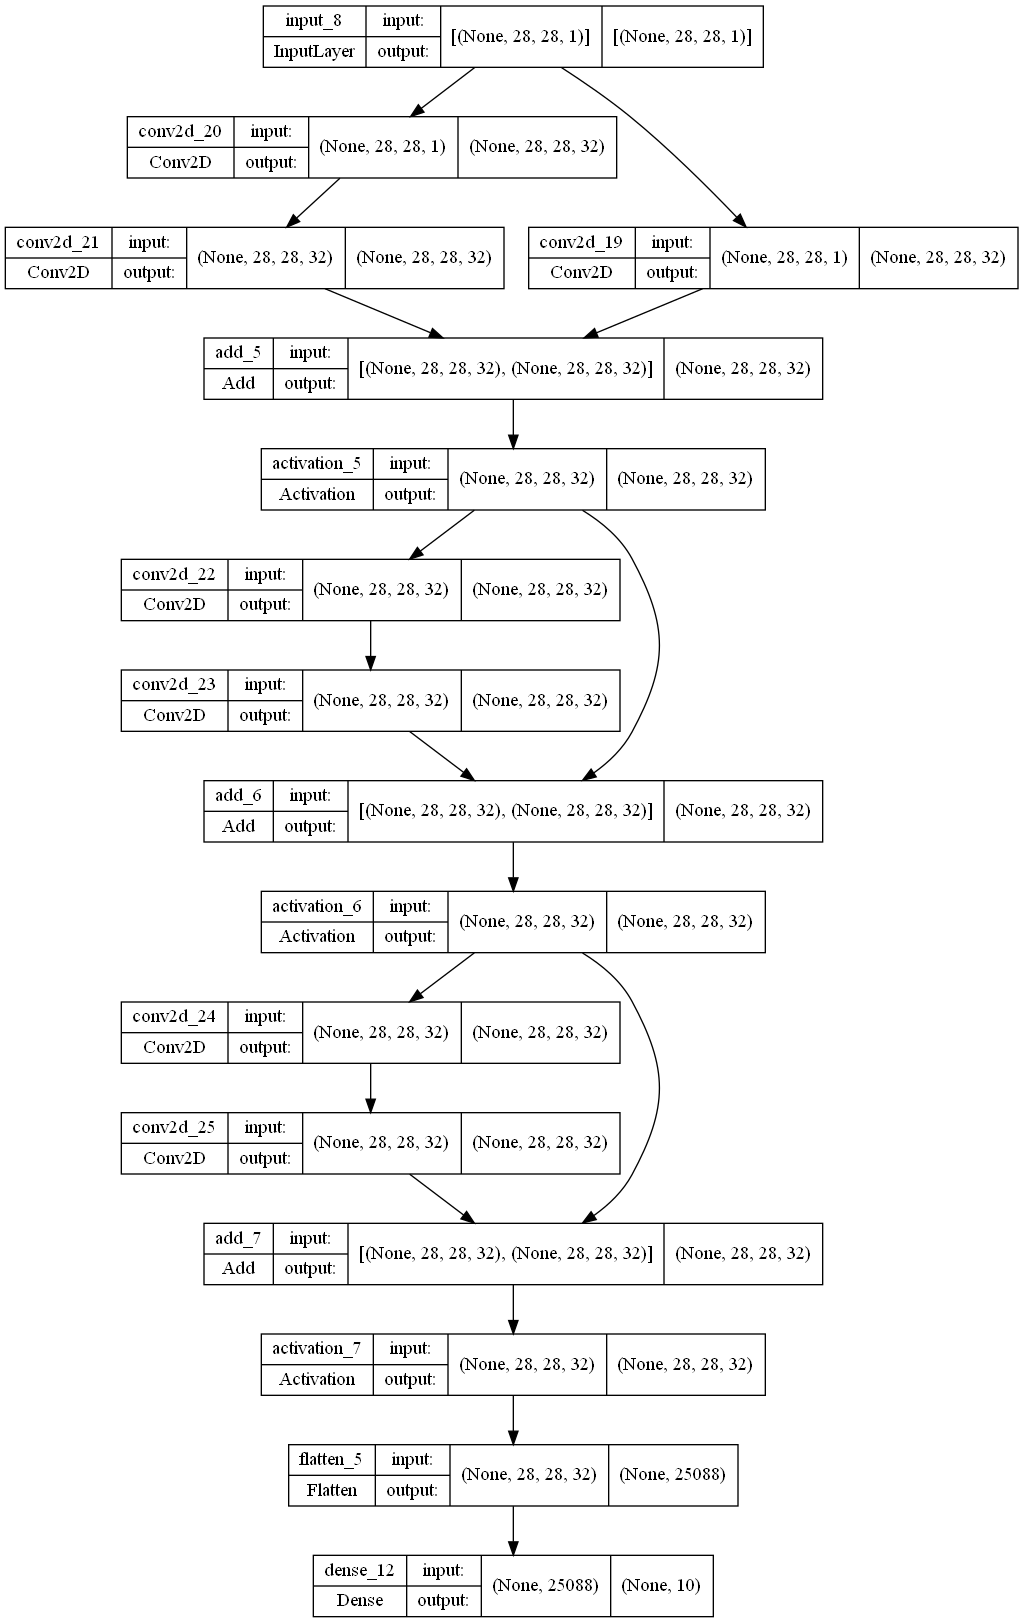

In [28]:
from tensorflow.keras import  Model, Input
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.utils import plot_model 

inp = Input(shape=(28, 28, 1))
x = residual_block(inp, n_filters=32)
# x = residual_block(x, n_filters=32)
# x = residual_block(x, n_filters=32)
x = Flatten()(x)
out = Dense(10, activation='softmax')(x)
resnet_model = Model(inp, out)
plot_model(resnet_model, show_shapes=True)


In [25]:
resnet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=5e-4))
resnet_model.fit(X_dev, y_dev, epochs=50, batch_size=64)

Epoch 1/50
637/637 [==============================] - 27s 42ms/step - loss: 0.1787 - accuracy: 0.9451
Epoch 2/50
637/637 [==============================] - 27s 42ms/step - loss: 0.0562 - accuracy: 0.9830
Epoch 3/50
637/637 [==============================] - 27s 42ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 4/50
637/637 [==============================] - 27s 42ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 5/50
637/637 [==============================] - 27s 43ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 6/50
637/637 [==============================] - 28s 43ms/step - loss: 0.0113 - accuracy: 0.9967
Epoch 7/50
637/637 [==============================] - 28s 44ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 8/50
637/637 [==============================] - 27s 43ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 9/50
637/637 [==============================] - 27s 42ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 10/50
637/637 [==============================] - 28s 43ms/step - loss: 0.004

In [26]:
performance = resnet_model.evaluate(X_val, y_val, batch_size=32)
dict(zip(resnet_model.metrics_names, performance))

40/40 [==============================] - 0s 6ms/step - loss: 0.1161 - accuracy: 0.9873


{'loss': 0.11610230803489685, 'accuracy': 0.9873015880584717}